In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def stats(data_dict, k):

    if isinstance(data_dict, dict):
        vectors = np.array(list(data_dict.values()))
    else:
        vectors = data_dict
    # keys = np.array(list(data_dict.keys()))
    
    n = vectors.shape[0]

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(vectors)

    # R^2

    inertia = kmeans.inertia_
    inertia_avg = inertia / n

    global_average = vectors.sum(axis=0) / n
    global_distance_squared_avg = np.sum(((vectors - global_average)**2)) / n

    R2 = 1 - inertia_avg / global_distance_squared_avg
    # print(f'R^2: {R2}')

    # Average importance distribution

    average_importance_dist = vectors.sum(axis=0) / n

    # Average ordered importance distribution
    # sorted_vectors = np.sort(vectors, axis=1)[:, ::-1]
    # average_ordered_importance_dist = sorted_vectors.sum(axis=1) / n

    return [R2, average_importance_dist, kmeans]#, average_ordered_importance_dist]

In [3]:
def elbow(data_dict, k_range):

    inertias_normalized = []
    for k in tqdm(k_range):
        _, __, kmeans = stats(data_dict, k)
        n = len(data_dict)
        print(n)
        inertia_normalized = kmeans.inertia_ / n
        inertias_normalized.append(inertia_normalized)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias_normalized, '-o', label='Normalized Inertia')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Normalized Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.legend()
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    

In [4]:
from sklearn.cluster import KMeans
import numpy as np
# import matplotlib.pyplot as plt
from tqdm import tqdm

def permutation_test(data_dict, k, n_perm):

    vectors = np.array(list(data_dict.values()))

    R2s = []

    for perm in tqdm(range(n_perm)):

        vectors_shuffled = vectors.copy()

        for i in range(vectors_shuffled.shape[0]):
            rand_perm = np.random.permutation(np.arange(vectors_shuffled.shape[0]))
            vectors_shuffled[:,i] = vectors_shuffled[:,i][rand_perm]

        R2, _, kmeans = stats(vectors_shuffled, k=k)
        R2s.append((R2, kmeans))

    return R2s

In [5]:
import pandas as pd

In [6]:
vector_dict = {}
for i in range(0, 1000, 100):
    partial_vector_dict = pd.read_pickle(f"importances/importance_{i+99}.pkl")
    vector_dict.update(partial_vector_dict)

In [7]:
vector_dict_l1 = {k:v[0].numpy() for k,v in vector_dict.items()}

 14%|████████████████▏                                                                                                | 1/7 [00:03<00:18,  3.14s/it]

1000


 29%|████████████████████████████████▎                                                                                | 2/7 [00:06<00:17,  3.55s/it]

1000


 43%|████████████████████████████████████████████████▍                                                                | 3/7 [00:15<00:23,  5.87s/it]

1000


 57%|████████████████████████████████████████████████████████████████▌                                                | 4/7 [00:29<00:27,  9.16s/it]

1000


 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 5/7 [00:50<00:26, 13.32s/it]

1000


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 6/7 [01:28<00:21, 21.74s/it]

1000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:38<00:00, 22.58s/it]

1000


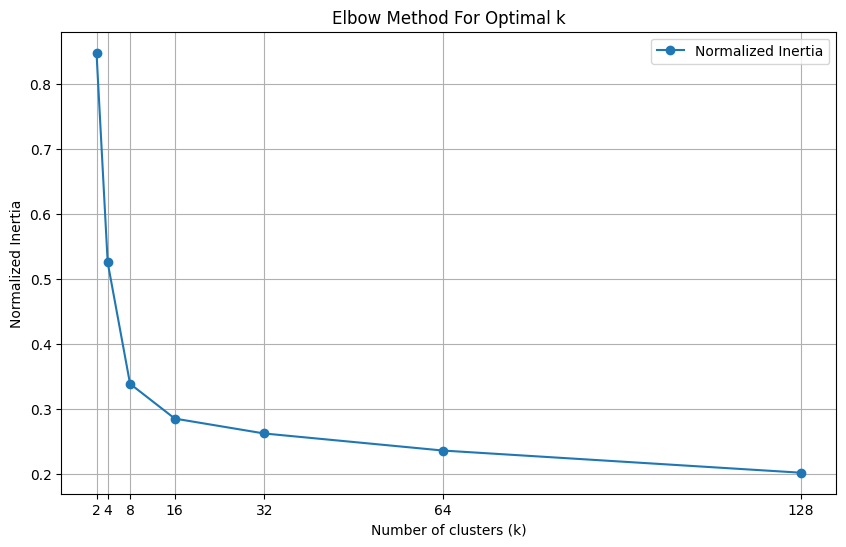

In [8]:
elbow(vector_dict_l1, k_range=[2, 4, 8, 16, 32, 64, 128])

 14%|████████████████▏                                                                                                | 1/7 [00:02<00:16,  2.82s/it]

1000


 29%|████████████████████████████████▎                                                                                | 2/7 [00:06<00:17,  3.45s/it]

1000


 43%|████████████████████████████████████████████████▍                                                                | 3/7 [00:15<00:22,  5.69s/it]

1000


 57%|████████████████████████████████████████████████████████████████▌                                                | 4/7 [00:29<00:27,  9.09s/it]

1000


 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 5/7 [00:50<00:26, 13.33s/it]

1000


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 6/7 [01:27<00:21, 21.57s/it]

1000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:35<00:00, 22.27s/it]

1000


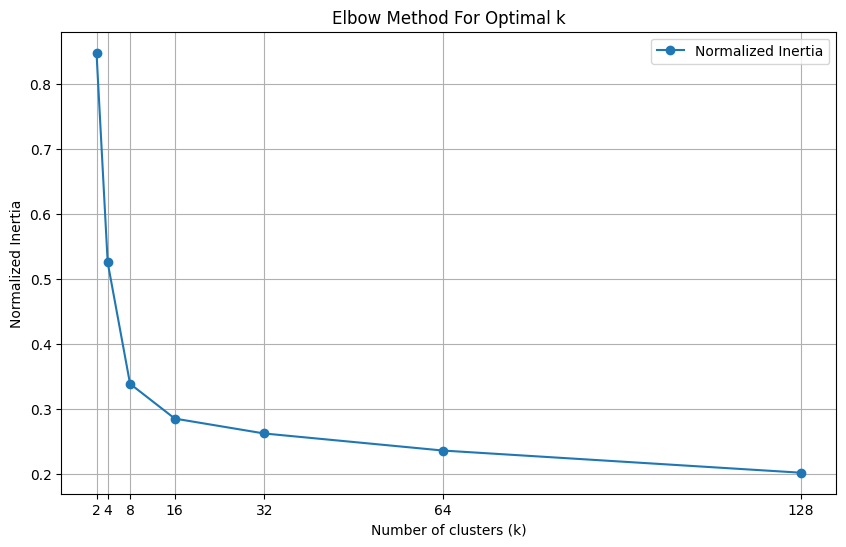

In [9]:
elbow(vector_dict_l1, k_range=[2, 4, 8, 16, 32, 64, 128])

In [10]:
list(vector_dict_l1.values())[0]

array([0.0177  , 0.01199 , 0.009094, ..., 0.0199  , 0.008575, 0.01015 ],
      dtype=float16)

In [ ]:
np.random.seed(123)
permutation_test_vectors = permutation_test(vector_dict_l1, 16, 150)

 31%|██████████████████████████████████▍                                                                           | 47/150 [10:30<21:53, 12.75s/it]

In [12]:
stats(vector_dict_l1, 16)

[0.8545933336810034,
 array([0.01664063, 0.01759375, 0.01585156, ..., 0.02075   , 0.01061719,
        0.01346094], dtype=float32),
 KMeans(n_clusters=16, n_init=10, random_state=42)]

array([[7, 2, 3],
       [1, 5, 6],
       [4, 8, 9]])

In [5]:
# Generate random data

n_data = 1000
vec_dim = 819

random_data_dict = {str(i): np.random.rand(vec_dim) for i in range(n_data)}

# Verify the size of the dictionary and the dimensionality of a sample vector
dict_size = len(random_data_dict)
sample_vector_dimension = random_data_dict['0'].shape[0]

dict_size, sample_vector_dimension

(1000, 819)

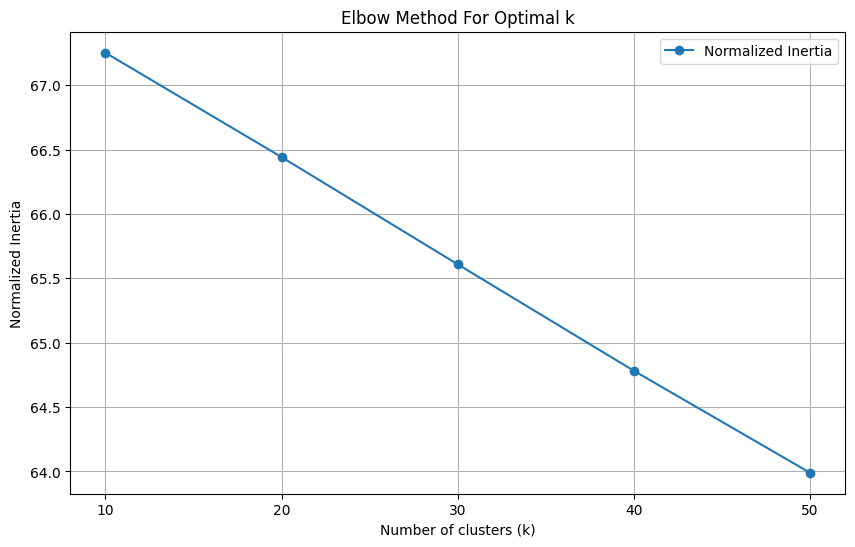

In [9]:
# Test run elbow on random data

k_list = np.arange(10, 51, 10)

elbow(random_data_dict, k_list)